In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

%matplotlib inline

# Preprocessing data

In [262]:
data = pd.read_csv("data/HRDataset_v14.csv", sep=',')
male, female = [x for _, x in data.groupby(data['GenderID'] == 0)]
labels = pd.Series(data['GenderID'].values)
labelsColoured = labels.map({0: 'pink', 1: 'blue'})

labelEncoder = LabelEncoder()
def labelToNumeric(attribute, df):
    df.loc.__setitem__((slice(None), (attribute)), labelEncoder.fit_transform(df[attribute]))

categories = data.select_dtypes(include='object').columns.tolist()
for category in categories:
    labelToNumeric(category, data)

imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)


for category in categories:
    labelToNumeric(category, male)
    labelToNumeric(category, female)

male = imputer.fit_transform(male)
female = imputer.fit_transform(female)



# MDS

In [254]:
mds = MDS(normalized_stress="auto")
mdsScaledData = mds.fit_transform(data)


## Visualize result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


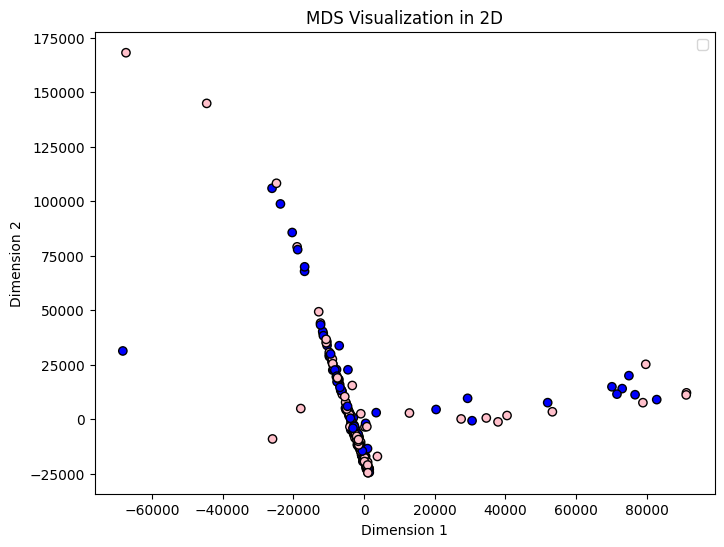

In [272]:
mds = MDS(normalized_stress="auto")
mdsScaledData = mds.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(mdsScaledData[:, 0], mdsScaledData[:, 1], c=labelsColoured, edgecolors="k")
plt.title('MDS Visualization in 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

### M/W

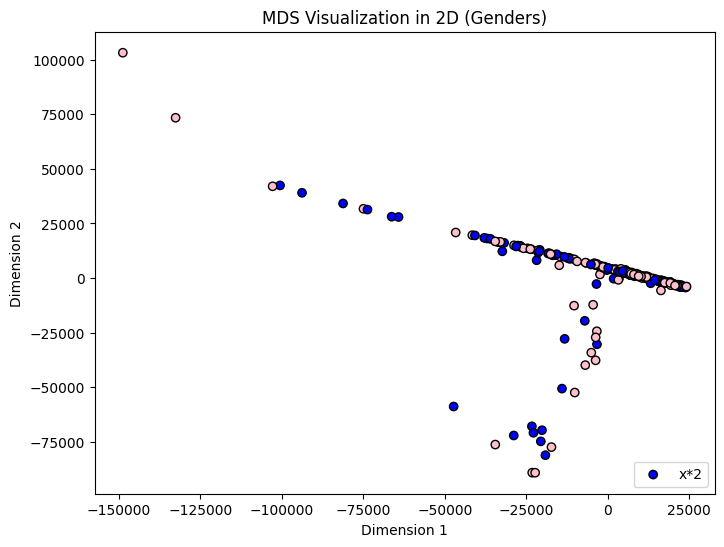

In [271]:
mdsG = MDS(normalized_stress="auto")

mdsScaledDataF = mdsG.fit_transform(female)
mdsScaledDataM = mdsG.fit_transform(male)

plt.figure(figsize=(8, 6))

plt.scatter(mdsScaledData[:, 0], mdsScaledData[:, 1], c=labelsColoured, edgecolors="k")
# plt.legend(("blue","pink"), ("Male", "Female"))
plt.title('MDS Visualization in 2D (Genders)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(["x*2" , "x*3"], ncol = 2 , loc = "lower right")

plt.show()

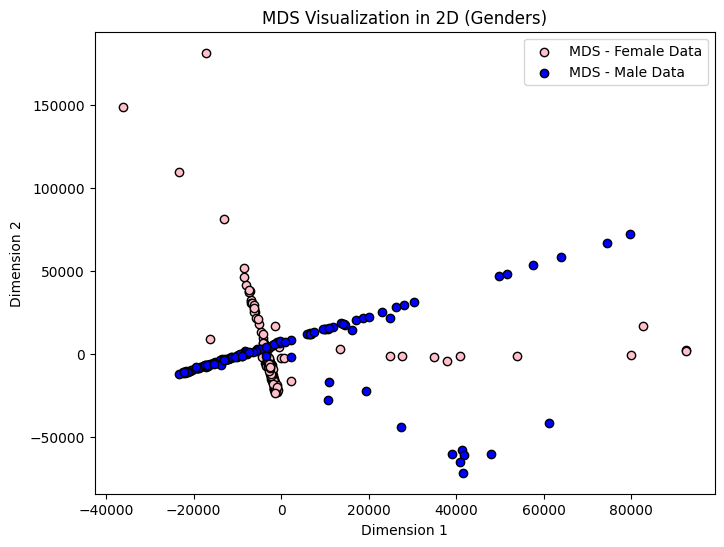

In [232]:
mdsScaledDataF = mds.fit_transform(female)
mdsScaledDataM = mds.fit_transform(male)

plt.figure(figsize=(8, 6))
plt.scatter(mdsScaledDataF[:, 0], mdsScaledDataF[:, 1], c=labels, label='MDS - Female Data', edgecolors="k")
plt.scatter(mdsScaledDataM[:, 0], mdsScaledDataM[:, 1], c="blue", label='MDS - Male Data', edgecolors="k")
plt.title('MDS Visualization in 2D (Genders)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

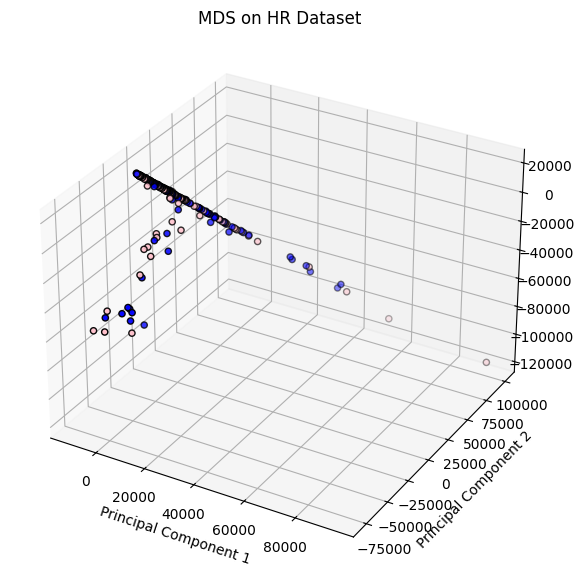

In [266]:
## 3D
mds3D = MDS(normalized_stress="auto", n_components=3)
mdsScaledData3D = mds3D.fit_transform(data)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(mdsScaledData3D[:, 0], mdsScaledData3D[:, 1], mdsScaledData3D[:, 2], edgecolor='k', c=labelsColoured)
plt.title('MDS on HR Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# PCA

## 2 Dimensions

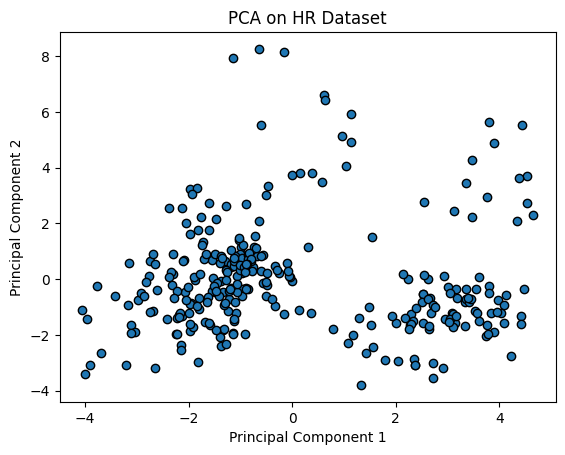

In [202]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

# PCA durchführen
pca = PCA(n_components=2)
pcaFeatures = pca.fit_transform(scaledData)

pcaData = pd.DataFrame(
    data=pcaFeatures, 
    columns=[
        'Principal Component 1', 
        'Principal Component 2'
        ])

plt.scatter(pcaFeatures[:, 0], pcaFeatures[:, 1], edgecolor='k')
plt.title('PCA on HR Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 3 Dimensions

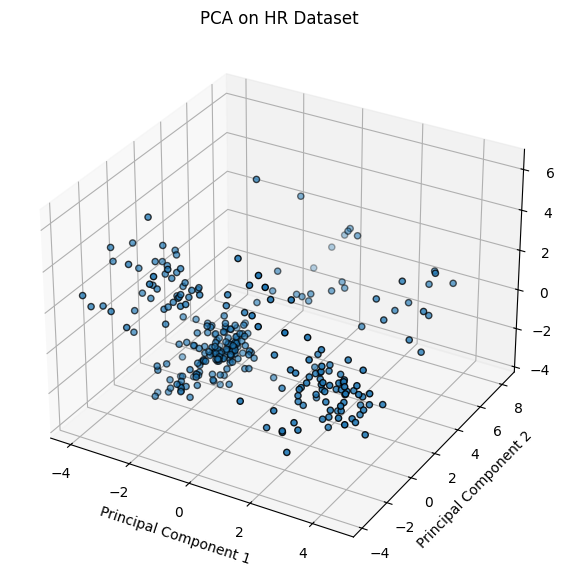

In [203]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

# PCA durchführen
pca3D = PCA(n_components=3)
pcaFeatures3D = pca3D.fit_transform(scaledData)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(pcaFeatures3D[:, 0], pcaFeatures3D[:, 1], pcaFeatures3D[:, 2], edgecolor='k')
plt.title('PCA on HR Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# t-SNE

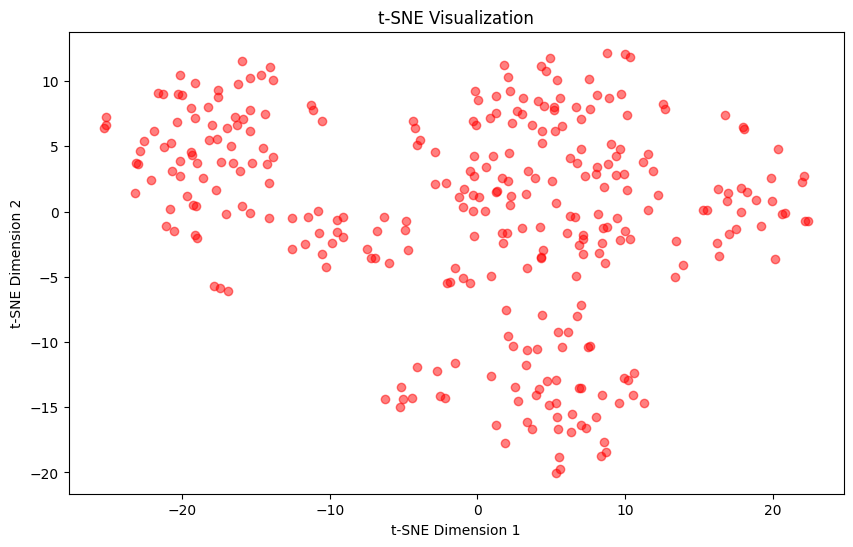

In [204]:
tsne = TSNE(n_components=2)
tsneData = tsne.fit_transform(scaledData)

# Visualisierung der t-SNE-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(tsneData[:, 0], tsneData[:, 1], marker='o', color="red", alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()